<a href="https://colab.research.google.com/github/stonewallmhk/Datascience/blob/master/WHO_Airquality_EDA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Perform an exploratory data analysis on global air quality data to identify patterns, trends, and potential correlations between air pollution levels and public health outcomes. Analyze various pollutants (PM2.5, PM10, NO2, etc.) across different cities and regions to understand the factors contributing to poor air quality and its potential health impacts.

Data URL:[WHO Air Quality Dataset_Jan_2024](https://www.who.int/publications/m/item/who-ambient-air-quality-database-(update-jan-2024))

--- Values Guidline ---
https://www.who.int/teams/environment-climate-change-and-health/air-quality-and-health/health-impacts/types-of-pollutants
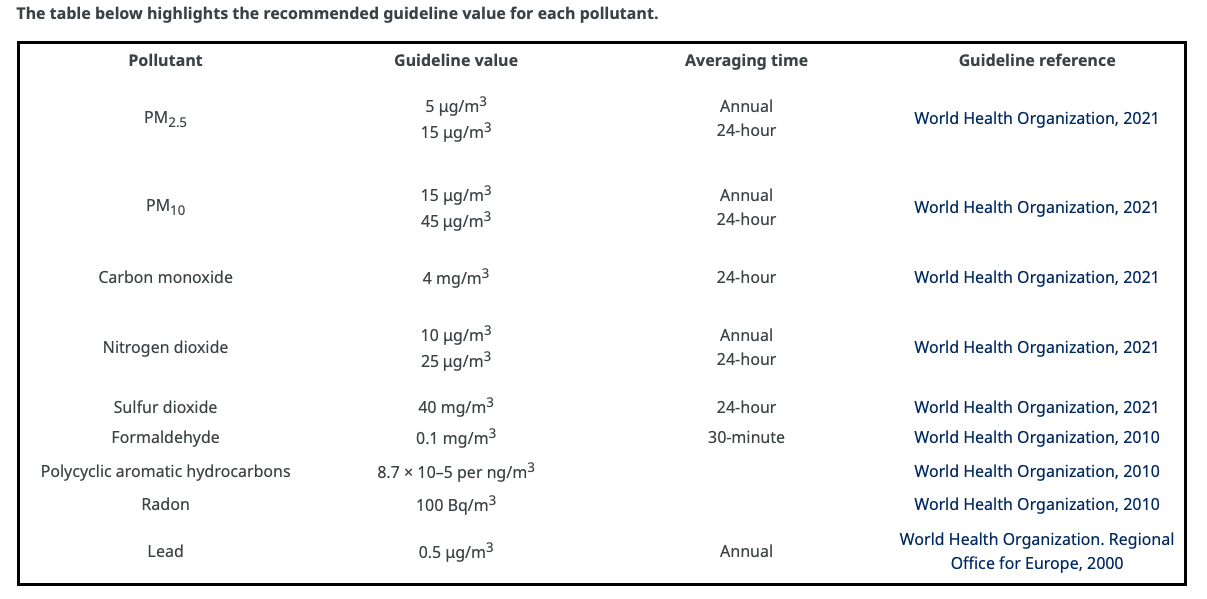

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# prompt: increase output row length to extend to screen

pd.set_option('display.max_rows', None)
pd.set_option('display.width', 900)

In [3]:
# Connect to google drive

from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
# import data
filename = '/content/drive/MyDrive/Data/AirQuality_WHO_012024.csv'
data = pd.read_csv(filename)
data.shape

(40098, 20)

In [5]:
data.columns

Index(['who_region', 'iso3', 'country_name', 'city', 'year', 'version', 'pm10_concentration', 'pm25_concentration', 'no2_concentration', 'pm10_tempcov', 'pm25_tempcov', 'no2_tempcov', 'type_of_stations', 'reference', 'web_link', 'population', 'population_source', 'latitude', 'longitude', 'who_ms'], dtype='object')

### Column Description


* who_region: WHO region classification
* iso3: Country code
* country_name
* city
* year: year of data
* version: Version of WHO database
* pm10_concentration: Annual mean concentration of Particle Matter 10
* pm25_concentration: Annual mean concentration of Particle Matter 2.5
* no2_concentration: Annual mean concentration of NO2
* _tempcov: Percentage of year for which data was measured. pm10_tempcov = 1 , means 1% of the year
*   remaining columns are not considered in this analysis



In [6]:
data.head()

,who_region,iso3,country_name,city,year,version,pm10_concentration,pm25_concentration,no2_concentration,pm10_tempcov,pm25_tempcov,no2_tempcov,type_of_stations,reference,web_link,population,population_source,latitude,longitude,who_ms
0,4_Eur,ESP,Spain,A Coruna/ESP,2013.0,"V4.0 (2018), V4.0 (2018), V4.0 (2018), V4.0 (2...",23.238,11.491,28.841,87.0,46.0,93.0,"Urban, Urban, Suburban",NaN,NaN,246146.0,"manual, manual, manual, manual",43.367900,-8.418571,1
1,4_Eur,ESP,Spain,A Coruna/ESP,2014.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023)",27.476,15.878,19.575,96.0,88.0,95.0,"Urban, Urban, Suburban",NaN,NaN,247604.0,NaN,43.368033,-8.418233,1
2,4_Eur,ESP,Spain,A Coruna/ESP,2015.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023), V6.0...",25.515,14.004,22.731,98.0,71.0,98.0,"Urban, Urban, Suburban, Suburban",NaN,NaN,247604.0,NaN,43.370375,-8.422900,1
3,4_Eur,ESP,Spain,A Coruna/ESP,2016.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023), V6.0...",23.057,13.160,20.204,98.0,98.0,98.0,"Urban, Urban, Suburban, Suburban",NaN,NaN,247604.0,NaN,43.370375,-8.422900,1
4,4_Eur,ESP,Spain,A Coruna/ESP,2017.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023), V6.0...",26.849,14.114,21.543,97.0,97.0,98.0,"Urban, Urban, Suburban, Suburban",NaN,NaN,247604.0,NaN,43.370375,-8.422900,1


## Descriptive Analysis:
1. Descriptive Analysis Questions:

* What is the average level of PM10, PM2.5, and NO2 across different cities and countries?
* Which cities or countries have the highest and lowest average concentrations of PM10, PM2.5, and NO2?
* What is the distribution of air quality measurements (PM10, PM2.5, NO2) across different WHO regions?
* What is the proportion of cities or regions exceeding the WHO recommended air quality limits for PM10, PM2.5, and NO2?
* What is the range of temporal coverage (tempcov columns) for air quality measurements? Are there any patterns in temporal coverage across different regions or cities?

In [7]:
# understand data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40098 entries, 0 to 40097
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   who_region          40098 non-null  object 
 1   iso3                40098 non-null  object 
 2   country_name        40098 non-null  object 
 3   city                40098 non-null  object 
 4   year                40095 non-null  float64
 5   version             40098 non-null  object 
 6   pm10_concentration  28672 non-null  float64
 7   pm25_concentration  21730 non-null  float64
 8   no2_concentration   26934 non-null  float64
 9   pm10_tempcov        22403 non-null  float64
 10  pm25_tempcov        16590 non-null  float64
 11  no2_tempcov         23402 non-null  float64
 12  type_of_stations    23331 non-null  object 
 13  reference           6652 non-null   object 
 14  web_link            1790 non-null   object 
 15  population          22433 non-null  float64
 16  popu

In [8]:
# Descriptive analysis
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,40095.0,2016.232672,3.116678e+00,2010.000000,2014.00000,2016.000000,2019.000000,2.022000e+03
pm10_concentration,28672.0,30.016375,2.954857e+01,0.730000,16.26475,21.335500,30.515500,5.400000e+02
pm25_concentration,21730.0,19.130923,1.749003e+01,1.000000,8.60325,12.710500,23.000000,4.364400e+02
no2_concentration,26934.0,18.861620,2.584506e+01,0.002000,10.16325,16.700000,24.911500,3.670314e+03
pm10_tempcov,22403.0,88.732134,2.027727e+01,0.000000,90.00000,96.000000,99.000000,1.000000e+02
pm25_tempcov,16590.0,84.124533,2.681910e+01,0.000000,86.00000,96.000000,99.000000,1.000000e+02
no2_tempcov,23402.0,88.092214,2.314964e+01,0.000000,92.00000,96.000000,98.000000,1.000000e+02
population,22433.0,757193.080818,2.123730e+06,5.000000,53006.00000,163729.000000,590032.000000,3.739313e+07
latitude,40098.0,40.024341,1.630938e+01,-53.158316,37.13880,43.822900,49.163367,6.967750e+01
longitude,40098.0,10.598472,5.777499e+01,-159.366240,-1.25890,10.512933,23.226400,1.784500e+02


## Key Insights:
1.	General Overview:
	* The dataset contains 40,095 observations (rows) for the year column, indicating a time span from 2010 to 2022.
	* However, not all columns have complete data. For example, pm10_concentration has 28,672 observations, pm25_concentration has 21,730, and no2_concentration has 26,934, suggesting missing data.
2.	Air Pollution Levels:
  * PM10 and PM2.5 have high maximum values and large STD values which could indicate outliers
  * NO2 (Nitrogen Dioxide) has a maximum value which is exceptionally high, which could indicate a data entry error or a genuine extreme pollution event.
3.	Temporal Coverage (tempcov):
	* The tempcov columns (pm10_tempcov, pm25_tempcov, no2_tempcov) show the percentage of temporal coverage for each pollutant.
	* The mean temporal coverage is relatively high (88.7% for PM10, 84.1% for PM2.5, and 88.1% for NO2), but there are instances with 0% coverage.
	* Minimum values of 0% indicate that some records have no data for the year, which may affect the reliability of the averages.
5.	WHO Member States (who_ms):
	* The column appears to indicate whether a country is a WHO member state, with a mean of approximately 0.999, suggesting most data points belong to WHO member countries.


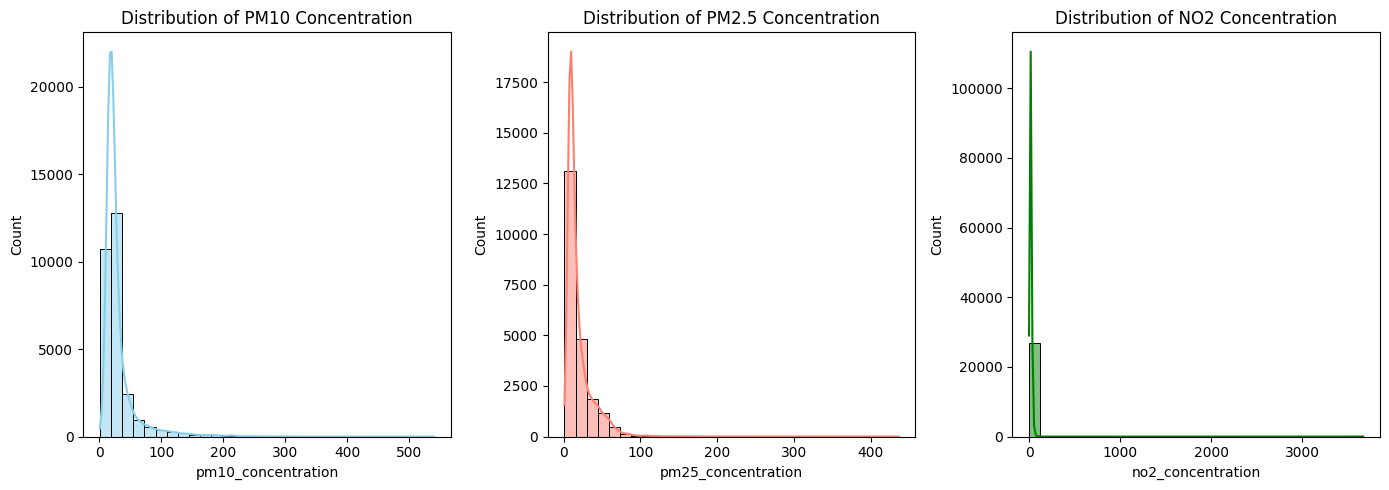

In [9]:
#Distribution Plots for Air Pollutant Levels

# Plot distributions for each pollutant concentration
plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
sns.histplot(data['pm10_concentration'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of PM10 Concentration')

plt.subplot(1, 3, 2)
sns.histplot(data['pm25_concentration'], bins=30, kde=True, color='salmon')
plt.title('Distribution of PM2.5 Concentration')

plt.subplot(1, 3, 3)
sns.histplot(data['no2_concentration'], bins=30, kde=True, color='green')
plt.title('Distribution of NO2 Concentration')

plt.tight_layout()
plt.show()

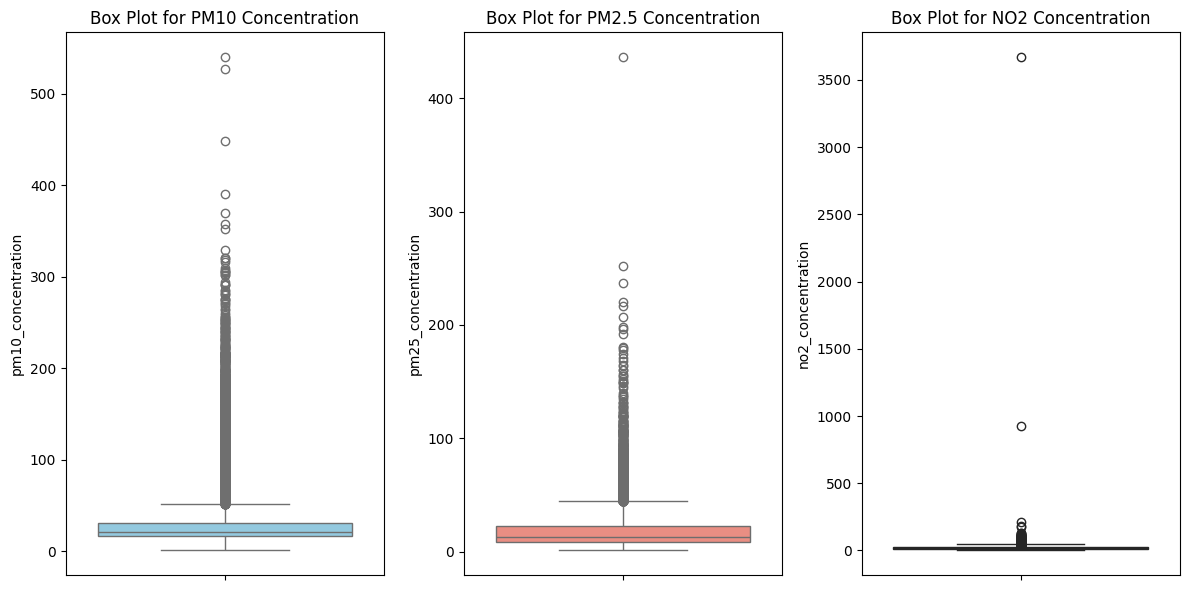

In [10]:
# Box Plots to Detect Outliers

# Plot box plots for each pollutant concentration
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.boxplot(y=data['pm10_concentration'], color='skyblue')
plt.title('Box Plot for PM10 Concentration')

plt.subplot(1, 3, 2)
sns.boxplot(y=data['pm25_concentration'], color='salmon')
plt.title('Box Plot for PM2.5 Concentration')

plt.subplot(1, 3, 3)
sns.boxplot(y=data['no2_concentration'], color='green')
plt.title('Box Plot for NO2 Concentration')

plt.tight_layout()
plt.show()

**Outliers**\
* PM10 has outliers above the value 400
* PM25 has outlier above the value 300
* NO2 has outlier above the value 500

In [11]:
# Find rows for the outlier values

# for PM10
outliers = data[(data['pm10_concentration'] > 400) | (data['pm25_concentration'] > 300) | (data['no2_concentration'] > 500)]
print(outliers)

      who_region iso3                country_name            city    year                                   version  pm10_concentration  pm25_concentration  no2_concentration  pm10_tempcov  pm25_tempcov  no2_tempcov        type_of_stations reference web_link  population                                  population_source   latitude  longitude  who_ms
369       3_Sear  IND                       India   Ahmedabad/IND  2017.0                               V5.0 (2022)                 NaN              436.44                NaN           NaN           NaN          NaN                     NaN       NaN      NaN   7342850.0                                       old database  22.996200  72.599600       1
26397      5_Emr  PAK                    Pakistan    Peshawar/PAK  2010.0                               V3.0 (2016)             540.000              111.00                NaN           NaN           NaN          NaN                     NaN       NaN      NaN   2202946.0                          

Check the values of the pollutant for outlier city for the year

In [12]:
# prompt: filter the main dataset where both city and year of each row in outliers matches

merged_df = pd.merge(data, outliers[['city', 'year']], on=['city', 'year'], how='inner')
print(merged_df)


  who_region iso3                country_name            city    year                                   version  pm10_concentration  pm25_concentration  no2_concentration  pm10_tempcov  pm25_tempcov  no2_tempcov        type_of_stations reference web_link  population                                  population_source   latitude  longitude  who_ms
0     3_Sear  IND                       India   Ahmedabad/IND  2017.0                               V5.0 (2022)                 NaN              436.44                NaN           NaN           NaN          NaN                     NaN       NaN      NaN   7342850.0                                       old database  22.996200  72.599600       1
1      5_Emr  PAK                    Pakistan    Peshawar/PAK  2010.0                               V3.0 (2016)             540.000              111.00                NaN           NaN           NaN          NaN                     NaN       NaN      NaN   2202946.0                             Imputed_f

-- These outliers values are replaced by average of all years for the city of each pollutant

In [13]:
# prompt: For pm25 values over 300, replace the value with mean value of the pollutant for that city. Repeat similar for pm10 over 400 and no2 over 500. When calculating the mean exclude the outlier values. If the mean is NULL, then delete the row from the dataset

def replace_outliers_with_city_mean(df, outlier_df, pollutant_col, outlier_threshold):
  """
  Replaces outlier values in a pollutant column with the mean value for that city,
  excluding the outlier values when calculating the mean.

  Args:
    df: The DataFrame containing the data.
    pollutant_col: The name of the pollutant column.
    outlier_threshold: The threshold above which values are considered outliers.

  Returns:
    The DataFrame with outlier values replaced by city means.
  """
  for city in outlier_df['city'].unique():
    city_data = df[df['city'] == city]
    outlier_rows = city_data[city_data[pollutant_col] > outlier_threshold]
    if not outlier_rows.empty:
      non_outlier_data = city_data[city_data[pollutant_col] <= outlier_threshold]
      city_mean = non_outlier_data[pollutant_col].mean()
      if not np.isnan(city_mean):
        print(city,' : ',city_mean)
        df.loc[(df['city'] == city) & (df[pollutant_col] > outlier_threshold), pollutant_col] = city_mean
      else:
        df = df.drop(df[(df['city'] == city) & (df[pollutant_col] > outlier_threshold)].index)
  return df

data = replace_outliers_with_city_mean(data, outliers, 'pm25_concentration', 300)
data = replace_outliers_with_city_mean(data, outliers, 'pm10_concentration', 400)
data = replace_outliers_with_city_mean(data, outliers, 'no2_concentration', 500)
print(data.shape)

Ahmedabad/IND  :  46.5075
Zenica/BIH  :  20.213
(40094, 20)


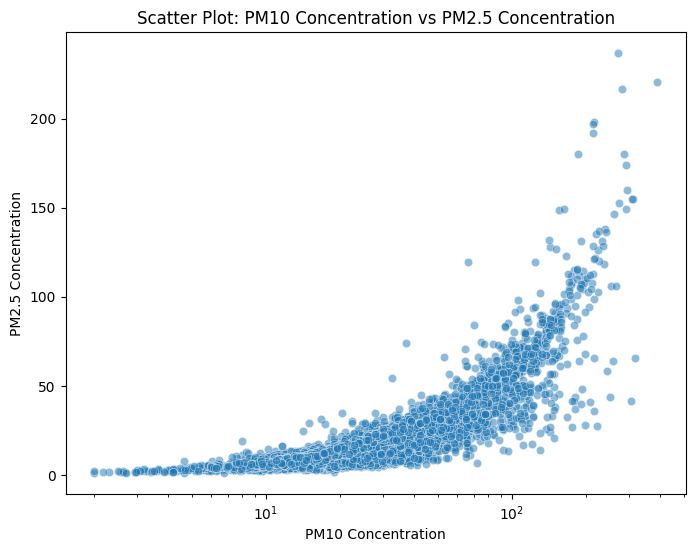

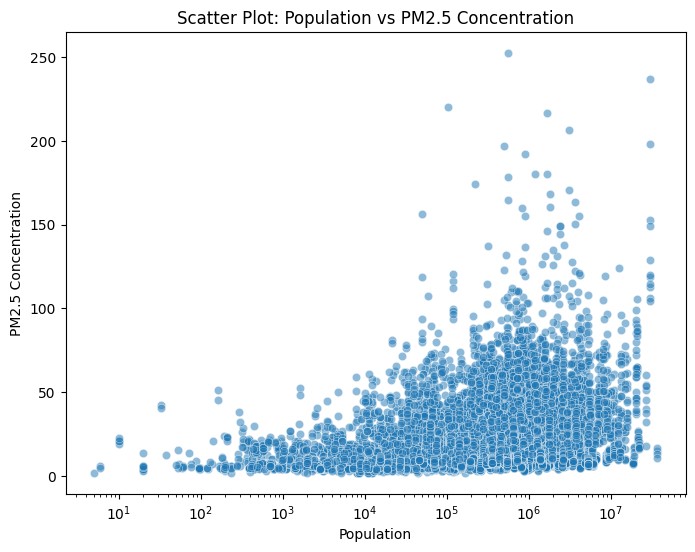

In [14]:
# Scatter plot between PM2.5 and PM10 concentrations

# Scatter plot between PM10 and PM2.5 concentrations
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['pm10_concentration'], y=data['pm25_concentration'], alpha=0.5)
plt.title('Scatter Plot: PM10 Concentration vs PM2.5 Concentration')
plt.xlabel('PM10 Concentration')
plt.ylabel('PM2.5 Concentration')
plt.xscale('log')  # Log scale to handle wide range of population values
plt.show()

# Scatter plot between population and PM2.5 concentrations
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['population'], y=data['pm25_concentration'], alpha=0.5)
plt.title('Scatter Plot: Population vs PM2.5 Concentration')
plt.xlabel('Population')
plt.ylabel('PM2.5 Concentration')
plt.xscale('log')  # Log scale to handle wide range of population values
plt.show()

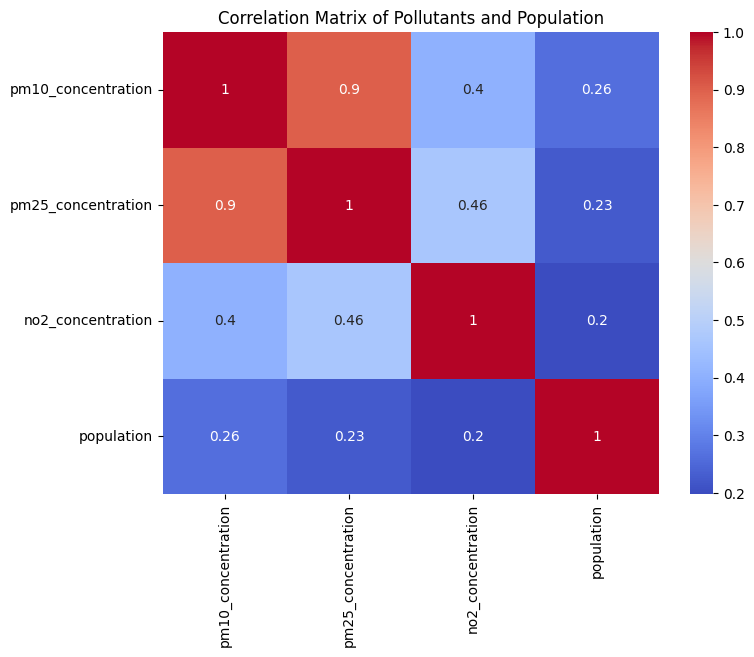

In [15]:
# Calculate the correlation matrix
correlation_matrix = data[['pm10_concentration', 'pm25_concentration', 'no2_concentration', 'population']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Pollutants and Population')
plt.show()

In [12]:
# Geographical Visualization

import folium
from folium.plugins import MarkerCluster

# Create a map centered around the median latitude and longitude
map_center = [data['latitude'].median(), data['longitude'].median()]
mymap = folium.Map(location=map_center, zoom_start=2)

# Create a marker cluster
marker_cluster = MarkerCluster().add_to(mymap)

# Add points to the map
for idx, row in data.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"City: {row['city']}<br>PM2.5: {row['pm25_concentration']} µg/m³<br>PM10: {row['pm10_concentration']} µg/m³",
        icon=folium.Icon(color='red' if row['pm25_concentration'] > 25 else 'green')
    ).add_to(marker_cluster)

# Display the map
mymap.save('air_quality_map.html')

KeyboardInterrupt: 

<ipython-input-13-a1031c31cad2>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='year', y='pm25_concentration', data=data, ci=None)


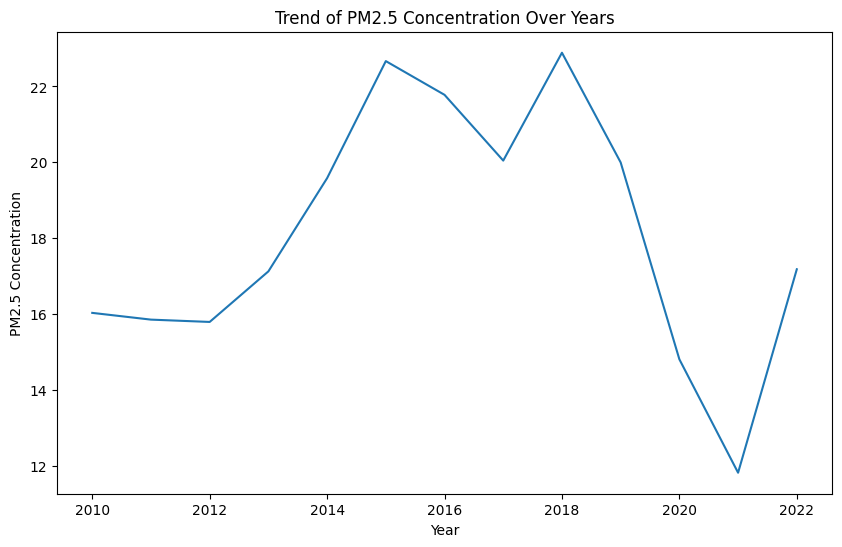

In [13]:
# Line plot to visualize temporal trends
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='pm25_concentration', data=data, ci=None)
plt.title('Trend of PM2.5 Concentration Over Years')
plt.xlabel('Year')
plt.ylabel('PM2.5 Concentration')
plt.show()

In [16]:
# prompt: write code for finding total null values for each column in the dataset data

data.isnull().sum()


,0
who_region,0
iso3,0
country_name,0
city,0
year,3
version,0
pm10_concentration,11425
pm25_concentration,18367
no2_concentration,13161
pm10_tempcov,17691


In [17]:
# prompt: get the values for country name, pm25_concentration, pm10_concentration and no2_concentration values for which year value is null

# Filter the DataFrame for rows where 'year' is null
null_year_data = data[data['year'].isnull()]

# Select the desired columns
result = null_year_data[['country_name', 'pm25_concentration', 'pm10_concentration', 'no2_concentration']]

# Display the result
print(result)


      country_name  pm25_concentration  pm10_concentration  no2_concentration
2767         India                 NaN                 NaN                NaN
8507         India                44.0                 NaN                NaN
27889        India                 NaN                 NaN                NaN


In [18]:
# prompt: remove the rows where the year value is null

# Remove rows where 'year' is null
data = data.dropna(subset=['year'])
print(data.shape)

(40091, 20)


In [20]:
missing_values_by_country = data.groupby('country_name').apply(lambda x: x.isnull().sum())
missing_values_by_country[['pm10_concentration', 'pm25_concentration', 'no2_concentration']]

,pm10_concentration,pm25_concentration,no2_concentration
country_name,,,
Afghanistan,1,0,1
Albania,12,12,2
Algeria,1,0,1
Andorra,0,9,0
Argentina,1,10,2
Australia,16,66,148
Austria,225,880,77
Bahamas,0,0,3
Bahrain,2,5,14


In [21]:
# prompt: find country-wise missing values count for each columns pm10_concentration, pm25_concentration, no2_concentration, pm10_tempcov, pm25_tempcov, no2_tempcov and order by highest to lowest

# Group by country and count missing values for specific columns
missing_values_by_country = data.groupby('country_name')[['pm10_concentration', 'pm25_concentration', 'no2_concentration', 'pm10_tempcov', 'pm25_tempcov', 'no2_tempcov']].apply(lambda x: x.isnull().sum()).sort_values(by=['pm10_concentration', 'pm25_concentration', 'no2_concentration', 'pm10_tempcov', 'pm25_tempcov', 'no2_tempcov'], ascending=False)

# Display the result
print(missing_values_by_country)


                                                    pm10_concentration  pm25_concentration  no2_concentration  pm10_tempcov  pm25_tempcov  no2_tempcov
country_name                                                                                                                                          
China                                                             3394                   1               3468          3880           411         3880
United States of America                                          1975                 532               2437          3888          3888         3888
Canada                                                            1013                  77                372          1019            77          369
Germany                                                            559                1778                155           586          1791          155
Spain                                                              552                1819    

## Filling Missing Values
Missing values for pm25_concentration, pm10_concentration and no2_concentration\
To fill the missing values for a city for a particular year, we take the average of other locations values of the same country for the same year.

In [22]:
# Creating a temporary dataset for a country that has NULL values and find the mean so that this can verified later when the missing data is filled

spain_missing_data = data[(data['country_name']== 'Spain') & (data['year']==2010)][['city', 'pm25_concentration']]
print(spain_missing_data)

mean_spain = spain_missing_data['pm25_concentration'].mean()
print(mean_spain)


                                   city  pm25_concentration
70                Abanto Y Ciervana/ESP                 NaN
331                         Aguimes/ESP               7.378
381                             Aia/ESP                 NaN
571                          Alagon/ESP                 NaN
644                        Albacete/ESP              14.159
656          Albalat Dels Tarongers/ESP                 NaN
766              Alcala De Guadaira/ESP                 NaN
776               Alcala De Henares/ESP                 NaN
791                         Alcaniz/ESP                 NaN
802                    Alcantarilla/ESP                 NaN
812                      Alcobendas/ESP                 NaN
814                          Alcora/ESP               9.617
815                        Alcorcon/ESP               8.894
819                        Alcorisa/ESP                 NaN
820                         Alcover/ESP                 NaN
830                           Alcoy/ESP 

In [23]:
# List of columns to fill missing values
columns_to_fill = ['pm10_concentration', 'pm25_concentration', 'no2_concentration']

# Define a function to fill missing values for each column
def fill_missing_values(group):
    for column in columns_to_fill:
        # Fill missing values with the mean of the column for the group
        group[column] = group[column].fillna(group[column].mean())
    return group

# Apply the function group-wise by country and year
df_filled = data.groupby(['country_name', 'year']).apply(fill_missing_values)

# Display the first few rows of the filled DataFrame
print(df_filled.head())

                          who_region iso3 country_name         city    year       version  pm10_concentration  pm25_concentration  no2_concentration  pm10_tempcov  pm25_tempcov  no2_tempcov type_of_stations                                          reference                                           web_link  population       population_source  latitude  longitude  who_ms
country_name year                                                                                                                                                                                                                                                                                                                                                                    
Afghanistan  2019.0 16488      5_Emr  AFG  Afghanistan    Kabul/AFG  2019.0   V5.0 (2022)                 NaN           119.77400                NaN           NaN          18.0          NaN              NaN  U.S. Department of State, United States Envi

In [24]:
# Verify the value of one of the field as created earlier

df_filled[(df_filled['country_name']== 'Spain') & (df_filled['year']==2010)][['city', 'pm25_concentration']]

city  pm25_concentration
country_name year                                                              
Spain        2010.0 70                Abanto Y Ciervana/ESP            9.865716
                    331                         Aguimes/ESP            7.378000
                    381                             Aia/ESP            9.865716
                    571                          Alagon/ESP            9.865716
                    644                        Albacete/ESP           14.159000
                    656          Albalat Dels Tarongers/ESP            9.865716
                    766              Alcala De Guadaira/ESP            9.865716
                    776               Alcala De Henares/ESP            9.865716
                    791                         Alcaniz/ESP            9.865716
                    802                    Alcantarilla/ESP            9.865716
                    812                      Alcobendas/ESP            9.865716
                    814                          Alcora/ESP            9.617000
                    815                        Alcorcon/ESP            8.894000
                    819                        Alcorisa/ESP            9.865716
                    820                         Alcover/ESP            9.865716
                    830                           Alcoy/ESP           11.059000
                    840                         Alcudia/ESP            9.865716
                    895                          Alfaro/ESP           11.260000
                    925                       Algeciras/ESP            9.865716
                    935                          Algete/ESP            9.362000
                    968                        Alicante/ESP           12.143000
                    1025                       Almazora/ESP           11.817000
                    1027                        Almeria/ESP            9.865716
                    1042                        Almonte/ESP            9.865716
                    1153                         Alzira/ESP            9.865716
                    1206                 Ametlla De Mar/ESP            9.865716
                    1246                        Amposta/ESP            9.865716
                    1611                          Arafo/ESP            8.507000
                    1633                Aranda De Duero/ESP            9.865716
                    1643                       Aranjuez/ESP            9.865716
                    1697           Arcos De La Frontera/ESP            9.865716
                    1731                Arganda Del Rey/ESP            9.865716
                    1744                       Arguedas/ESP            9.865716
                    1763                          Arico/ESP            6.589000
                    1819                          Arona/ESP           11.121000
                    1847             Arrasate Mondragon/ESP            9.865716
                    1857                       Arrecife/ESP            4.946000
                    1876                   Arrigorriaga/ESP            9.865716
                    1877                        Arrubal/ESP           10.233000
                    1887                        Arteixo/ESP            9.865716
                    1904                         Arucas/ESP            4.820000
                    2067                      Astillero/ESP            9.865716
                    2075                         Atazar/ESP            8.909000
                    2322                         Aviles/ESP            9.865716
                    2391                       Azpeitia/ESP            9.865716
                    2401            Azuqueca De Henares/ESP            9.865716
                    2515                        Badajoz/ESP            9.865716
                    2526                       Badalona/ESP            9.865716
                    2633                         Bailen

In [27]:
df_filled.reset_index(drop=True, inplace=True)
df_filled.head()

,who_region,iso3,country_name,city,year,version,pm10_concentration,pm25_concentration,no2_concentration,pm10_tempcov,pm25_tempcov,no2_tempcov,type_of_stations,reference,web_link,population,population_source,latitude,longitude,who_ms
0,5_Emr,AFG,Afghanistan,Kabul/AFG,2019.0,V5.0 (2022),NaN,119.77400,NaN,NaN,18.0,NaN,NaN,"U.S. Department of State, United States Enviro...","[[[""EPA AirNow DOS"",""http://airnow.gov/index.c...",4221532.0,Imputed_from_UNWUP2018,34.53581,69.19051,1
1,4_Eur,ALB,Albania,Durres/ALB,2014.0,V6.0 (2023),13.854,7.74200,36.734,40.0,40.0,9.0,Urban,European Environmental Agency,https://www.eea.europa.eu/themes/air/explore-a...,NaN,NaN,41.31990,19.44920,1
2,4_Eur,ALB,Albania,Elbasan/ALB,2014.0,V6.0 (2023),48.500,12.91075,33.150,37.0,NaN,68.0,Urban,European Environmental Agency,https://www.eea.europa.eu/themes/air/explore-a...,NaN,NaN,41.11100,20.08170,1
3,4_Eur,ALB,Albania,Kastrat/ALB,2014.0,V6.0 (2023),22.438,12.06800,21.793,60.0,60.0,14.0,Urban,European Environmental Agency,https://www.eea.europa.eu/themes/air/explore-a...,NaN,NaN,42.31390,19.52340,1
4,4_Eur,ALB,Albania,Korce/ALB,2014.0,V6.0 (2023),40.863,24.00100,9.264,66.0,66.0,52.0,Suburban,European Environmental Agency,https://www.eea.europa.eu/themes/air/explore-a...,NaN,NaN,40.62590,20.78020,1


In [28]:
# Verify all missing values are addressed
missing_values_by_country = df_filled.groupby('country_name').apply(lambda x: x.isnull().sum())
missing_values_by_country[['pm10_concentration', 'pm25_concentration', 'no2_concentration']]

,pm10_concentration,pm25_concentration,no2_concentration
country_name,,,
Afghanistan,1,0,1
Albania,0,0,0
Algeria,1,0,1
Andorra,0,9,0
Argentina,1,4,2
Australia,0,0,14
Austria,0,0,0
Bahamas,0,0,3
Bahrain,2,3,13


In [37]:
#df_filled[df_filled['country_name']=='China'][['year', 'city', 'no2_concentration']]
df_filled[df_filled['country_name']=='China'].groupby(['year'])['no2_concentration'].mean()

,no2_concentration
year,
2011.0,NaN
2012.0,NaN
2013.0,44.389831
2014.0,42.560377
2015.0,35.851279
2016.0,31.994571
2017.0,NaN
2018.0,NaN
2019.0,NaN


##**Outlier detection and processing**


In [60]:
df_filled.isnull().sum()

,0
who_region,0
iso3,0
country_name,0
city,0
year,0
version,0
pm10_concentration,929
pm25_concentration,804
no2_concentration,3695
pm10_tempcov,17688


In [26]:
# prompt: # prompt: create a dataframe with descriptive analysis of pm25, pm10 and no2 values along IQR range per each city

# Create an empty list to store the results
results = []

# Loop through each unique city
for city in df_filled['city'].unique():
  city_data = df_filled[df_filled['city'] == city]

  # Calculate the IQR for pm25, pm10, and no2
  for column in ['pm25_concentration', 'pm10_concentration', 'no2_concentration']:
    Q1 = city_data[column].quantile(0.25)
    Q3 = city_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Calculate descriptive statistics within the IQR range
    within_iqr_data = city_data[(city_data[column] >= lower_bound) & (city_data[column] <= upper_bound)]
    mean = within_iqr_data[column].mean()
    median = within_iqr_data[column].median()
    std = within_iqr_data[column].std()
    min_val = within_iqr_data[column].min()
    max_val = within_iqr_data[column].max()

    # Append the results to the list
    results.append({
        'city': city,
        'pollutant': column,
        'mean': mean,
        'median': median,
        'std': std,
        'min': min_val,
        'max': max_val,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    })

# Create a DataFrame from the results
descriptive_df = pd.DataFrame(results)




In [33]:
# Display the DataFrame
print(descriptive_df[descriptive_df['mean'].notnull()].head(20))

                      city           pollutant        mean      median        std       min        max  lower_bound  upper_bound
0                Kabul/AFG  pm25_concentration  119.774000  119.774000        NaN  119.7740  119.77400   119.774000   119.774000
3               Durres/ALB  pm25_concentration   15.353000   14.323000   5.562837    7.7420   23.16100     3.636250    27.486250
4               Durres/ALB  pm10_concentration   26.499571   24.559000  10.500576   13.8540   42.99400     2.982500    49.062500
5               Durres/ALB   no2_concentration   21.291000   23.555500   5.350234   13.4780   26.63400    10.124500    35.060500
6              Elbasan/ALB  pm25_concentration   15.293375   16.534125   2.486962   11.4400   17.49375    10.827187    20.976688
7              Elbasan/ALB  pm10_concentration   31.826500   28.301250   8.996549   22.8770   48.50000    10.753063    50.800562
8              Elbasan/ALB   no2_concentration   24.796667   24.325500   1.874979   23.0190   27.

In [36]:
descriptive_df[(descriptive_df['max'] > descriptive_df['upper_bound'])]

,city,pollutant,mean,median,std,min,max,lower_bound,upper_bound


In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='city', y='pm25_concentration', data=df_filled)
plt.title('Box Plot of PM2.5 Concentration by City')
plt.xticks(rotation=90)
plt.show()

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7fde09f4f130> (for post_execute):


KeyboardInterrupt: 

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 34382 (\N{CJK UNIFIED IDEOGRAPH-864E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 33521 (\N{CJK UNIFIED IDEOGRAPH-82F1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20844 (\N{CJK UNIFIED IDEOGRAPH-516C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22253 (\N{CJK UNIFIED IDEOGRAPH-56ED}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21271 (\N{CJK UNIFIED IDEOGRAPH-5317}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


Error in callback <function flush_figures at 0x7fde09f4e3b0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pm10_concentration', y='pm25_concentration', data=df_filled, hue='city')
plt.title('Scatter Plot of PM10 vs PM2.5 Concentration')
plt.show()

In [1]:
df_filled.groupby(['country_name','year'])['pm25_concentration'].agg(['mean','median','max','min'])

NameError: name 'df_filled' is not defined

**Inspect each column values**

In [ ]:
data.who_region.unique()

array(['4_Eur', '6_Wpr', '2_Amr', '5_Emr', '1_Afr', '3_Sear', '7_NonMS'],
      dtype=object)

In [ ]:
data.iso3.unique()

array(['ESP', 'CHN', 'DEU', 'CHE', 'DNK', 'NOR', 'CAN', 'BEL', 'IRN',
       'MEX', 'GEO', 'ITA', 'USA', 'GBR', 'SAU', 'FRA', 'ARE', 'GHA',
       'TUR', 'ETH', 'AUS', 'IND', 'ISR', 'CYP', 'GRC', 'KWT', 'FIN',
       'HUN', 'SWE', 'ISL', 'JOR', 'QAT', 'CRI', 'PRT', 'ROU', 'NZL',
       'DZA', 'AUT', 'ECU', 'BRA', 'NLD', 'CHL', 'KOR', 'MDG', 'COL',
       'BGR', 'TKM', 'KAZ', 'PRY', 'PER', 'IRL', 'MLT', 'POL', 'THA',
       'LBN', 'BLR', 'IRQ', 'CMR', 'PHL', 'ARG', 'BTN', 'IDN', 'KHM',
       'SVK', 'MNE', 'VEN', 'BGD', 'LUX', 'MYS', 'MUS', 'CZE', 'ZAF',
       'SRB', 'MAR', 'BIH', 'KGZ', 'MKD', 'TUN', 'EGY', 'VNM', 'SVN',
       'JPN', 'BOL', 'LKA', 'BEN', 'SEN', 'HRV', 'DOM', 'LTU', 'ALB',
       'TJK', 'NPL', 'AND', 'PAK', 'GTM', 'BHR', 'NGA', 'AFG', 'UGA',
       'EST', 'MMR', 'MNG', 'UKR', 'JAM', 'CUB', 'LVA', 'MDV', 'KEN',
       'MCO', 'URY', 'TZA', 'RUS', 'BHS', 'PAN', 'TTO', 'PRI', 'SLV',
       'SGP', 'FJI', 'UZB', 'HND', 'LIE', 'LAO'], dtype=object)